# Linear Regression
This notebook contains examples and code explainig how to use linear regression for supervised learning.
The code is based on several examples from the internet - credits at the end of the notebook.

## 3. Introduction to Multiple Linear Regression

In [82]:
import pandas
import statsmodels.api as sm

In [83]:
from sklearn import datasets ## imports datasets from scikit-learn
#here we are using breast cancer data instead
data = datasets.load_breast_cancer() 

### Example data from sklearn

In [84]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### These are the independent variables

In [85]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

<font color= blue>Since we want to practice OLS, we are ignoring the target of classification here and selecting a different attribute as a target instead. We are chossing <b>"compactness error"</b> as a target for practice sake here

### Define the data to fit a model

In [86]:
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
pd.set_option('display.max_columns', 200)
df = pd.DataFrame(data.data, columns=data.feature_names)
df.shape

(569, 30)

### Use statsmodels and run a regression without constant

In [87]:
import statsmodels.api as sm

X = df["mean concavity"] ## X usually means our input variables (or independent variables)
y = df["compactness error"] ## Y usually means our output/dependent variable

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

### Interpretation

**Coefficient (coef):** Means that as the RM variable increases by 1, the predicted value of MDEV increases by 3.634

**R-squared:** Is the percentage of *variance* our model explains (also called coefficient of determination).
- Best possible score is 1.0 and it can be negative (because the model can be worse than random!). 
- A constant model that always predicts the expected value of y, disregarding the input features, would get a R-squared score of 0.0.

**The standard error:** standard deviation of the sampling distribution of a statistic, most commonly of the mean.

**The t scores and p-values:** Useful for hypothesis testing. It means that RM has statistically significant p-value; we predict at a 95% percent confidence that the value of RM is between 3.548 to 3.759.

In [88]:
# Print out the statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      compactness error   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1710.
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          1.86e-173
Time:                        15:24:34   Log-Likelihood:                 1561.9
No. Observations:                 569   AIC:                            -3122.
Df Residuals:                     568   BIC:                            -3118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
mean concavity     0.2261      0.005     41.354      0.000       0.215       0.237
==============================================================================
Omnibus:                      104.998   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.995
Skew:                           0.697   Prob(JB):                    3.72e-120
Kurtosis:                       7.610   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Use statsmodels and run a regression with constant

In [89]:
import statsmodels.api as sm # import statsmodels 
X = sm.add_constant(X) ## Add an intercept or constant to the model

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [90]:
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      compactness error   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     462.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):           1.79e-75
Time:                        15:24:35   Log-Likelihood:                 1651.6
No. Observations:                 569   AIC:                            -3299.
Df Residuals:                     567   BIC:                            -3291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0121      0.001     14.498      0.000       0.010       0.014
mean concavity     0.1506      0.007     21.507      0.000       0.137       0.164
==============================================================================
Omnibus:                      281.712   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2092.392
Skew:                           2.060   Prob(JB):                         0.00
Kurtosis:                      11.443   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<font color=blue>In our case, adding a constant reduces our R-squared results. Our understanding is that negative values are not necessary here in our independent variable "mean concavity" and that's why the score gets reduced instead.
<br><br>
Below, we are using polufit library of numpy to plot a scatter plot along with regression line in it.

Text(0.5,1,'Scatter plot b/w Compactness Error and Mean Concavity')

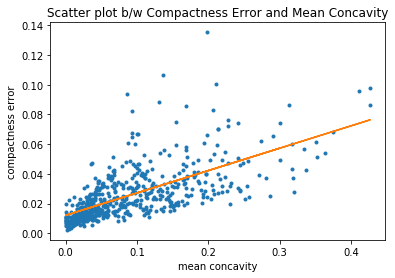

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.polynomial.polynomial import polyfit



b, m = polyfit(X['mean concavity'], y, 1)

plt.plot(X['mean concavity'], y, '.')
plt.plot(X['mean concavity'], b + m * X['mean concavity'], '-')
plt.xlabel('mean concavity')
plt.ylabel('compactness error')
plt.title('Scatter plot b/w Compactness Error and Mean Concavity')

<h2>Outliers removal impact</h2>

In [92]:
def remove_outliers(df_local):
    # For each feature find the data points with extreme high or low values
    for feature in df_local.keys():

        # TODO: Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(df_local[feature],25)

        # TODO: Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(df_local[feature],75)
        IQR = Q3-Q1

        # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3-Q1)*1.5

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = []

    # Remove the outliers, if any were specified
    good_data = df_local.drop(df_local.index[outliers]).reset_index(drop = True)
    return good_data

In [94]:
df_no_out = remove_outliers(df)
print(df_no_out.shape)

(569, 30)


<font color=blue>We used IQR method to detect any outliers in our original dataset. It appears that we do not have any in our considered features since the shape of data remained the same. So finding impact of removing outlier did not results in any improvements.

### Performing a Multiple Linear Regression

<font color=blue>Now we will add some other "random" variable to see their impact on our results.

In [96]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']]
y = df['concavity error'] 
#X = sm.add_constant(X) ## Add an intercept or constant to the model

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        concavity error   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     451.7
Date:                Mon, 08 Jul 2019   Prob (F-statistic):          2.75e-260
Time:                        15:27:42   Log-Likelihood:                 1598.9
No. Observations:                 569   AIC:                            -3178.
Df Residuals:                     559   BIC:                            -3134.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
mean radius                0.0436      0.007      6.220      0.000       0.030       0.057
mean texture              -0.0004      0.000     -2.403      0.017      -0.001    -6.7e-05
mean perimeter            -0.0066      0.001     -5.974      0.000      -0.009      -0.004
mean area              -6.382e-06   1.04e-05     -0.613      0.540   -2.68e-05    1.41e-05
mean smoothness           -0.2845      0.074     -3.848      0.000      -0.430      -0.139
mean compactness           0.0663      0.048      1.390      0.165      -0.027       0.160
mean concavity             0.7510      0.026     28.486      0.000       0.699       0.803
mean concave points       -0.7667      0.071    -10.730      0.000      -0.907      -0.626
mean symmetry             -0.0088      0.029     -0.301      0.763      -0.066       0.048
mean fractal dimension     0.4980      0.136      3.669      0.000       0.231       0.765
==============================================================================
Omnibus:                      320.216   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5953.483
Skew:                           2.065   Prob(JB):                         0.00
Kurtosis:                      18.299   Cond. No.                     1.82e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

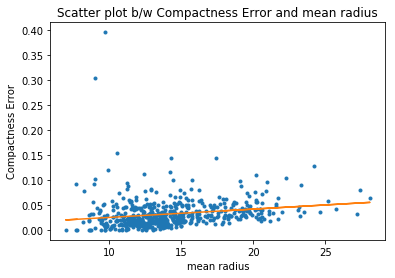

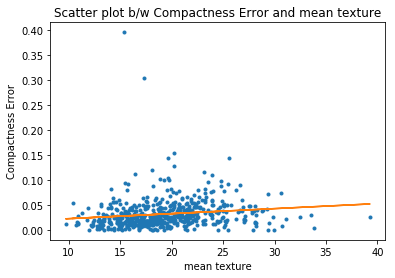

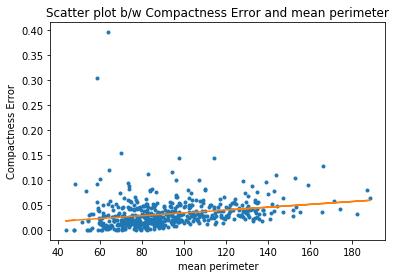

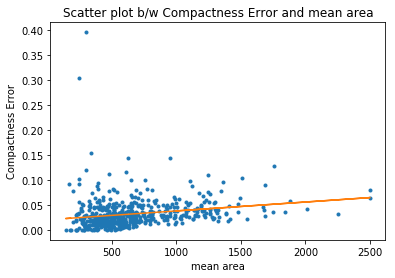

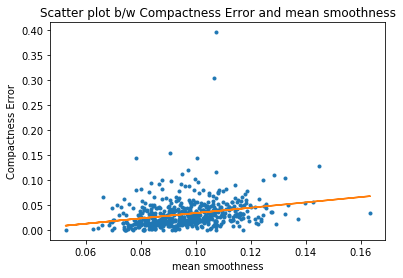

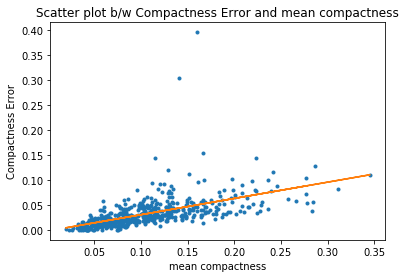

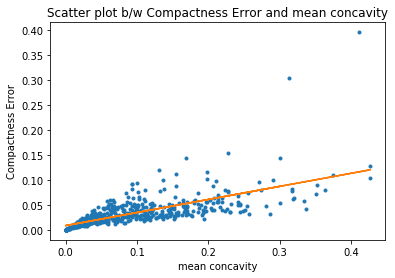

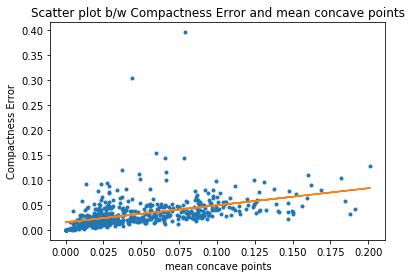

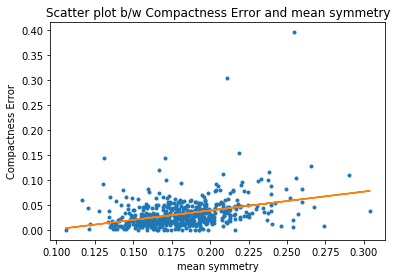

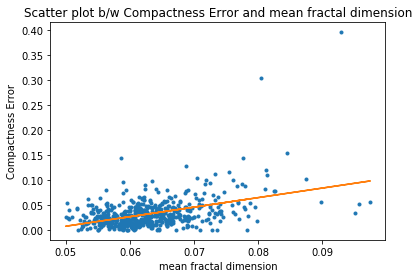

In [110]:
for col in X.columns:
    titl = 'Scatter plot b/w Compactness Error'+col
    b, m = polyfit(X[col], y, 1)
    plt.plot(X[col], y, '.')
    plt.plot(X[col], b + m * X[col], '-')
    plt.xlabel(col)
    plt.ylabel('Compactness Error')
    titl = 'Scatter plot b/w Compactness Error and '+col
    plt.title(titl)
    plt.show()

### Observations
<font color= blue>
- After adding several other variables, we saw the R-squared jump up from 0.75 to 0.89 which is much better.
- From the plots above, we conclude that mean fractal dimension, mean concavity, and mean compactness are the highest contributing factors since their linearity (slope) is the steepest. This is also evident from the postive cofficients in the results above.
- It will be interesting to find collinearity among independent variables first and then re-evaluating the model
- It will also be interesting to see affect of "scaling" on the model results